<b>1. labaratorijska vježba </b>

Diskriminativni model - za podatak x izravno generira uvjetnu vjerojatnost zavisne varijable P(Y|X)

Osnovni diskriminativni duboki model - višeslojna unaprijedna neuronska mreža

Što radi umjetni neuron? Afinu redukciju ulaznog vektora - $\mathbf{f(w^tx + b)}$

f = prijenosna funkcija, nelinearna -> uvodi nelinearnost u model

Za razliku od logističke regresije, funkcija gubitka dubokih modela nije konveksna, pa nemamo garanciju da ćemo pronaći globalni optimum.

<b>Zapis slojeva neuronske mreže</b>

k-ti sloj unaprijedne potpuno povezane mreže




In [1]:
import torch
# definiranje operacije
def f(x, a, b):   
    return a * x + b

# definiranje varijabli i izgradnja dinamičnog 
# računskog grafa s unaprijednim prolazom
a = torch.tensor(5., requires_grad=True)
b = torch.tensor(8., requires_grad=True)
x = torch.tensor(2.)
y = f(x, a, b)
s = a ** 2

# unatražni prolaz koji računa gradijent 
# po svim tenzorima zadanim s requires_grad=True
y.backward()
s.backward()               # gradijent se akumulira
assert x.grad is None      # pytorch ne računa gradijente po x
assert a.grad == x + 2 * a # dy/da + ds/da
assert b.grad == 1         # dy/db + ds/db

# ispis rezultata
print(f"y={y}, g_a={a.grad}, g_b={b.grad}")

y=18.0, g_a=12.0, g_b=1.0


<b>1.Generiranje linearno nerazdvojivih podataka </b>

C:\Users\Dorian\DU lab 1\data.py:69: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx0, xx1, values,


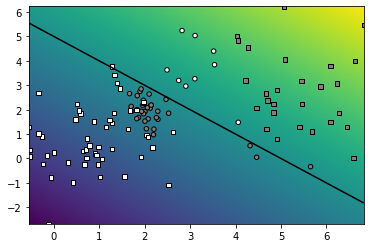

In [2]:
from data import *

np.random.seed(100)
  
# get data - vidiš, tu ti 4 gaussove razdiobe generiraju 2 razreda
# zato imaš veću varijancu u podacima u odnosu na sample_gauss_2d, te je stoga ovo nešto složenije za modelirati
X,Y_ = sample_gmm_2d(4, 2, 30)
# X,Y_ = sample_gauss_2d(2, 100)

# get the class predictions
Y = myDummyDecision(X)>0.5  

# graph the decision surface
rect=(np.min(X, axis=0), np.max(X, axis=0))
graph_surface(myDummyDecision, rect, offset=0)
  
# graph the data points
graph_data(X, Y_, Y, special=[])

plt.show()


In [3]:
# vidimo da smo dobili linearno nerazdvojive podatke!

<b>2. Višeslojna klasifikacija u Pythonu</b>

Final loss:  0.3208280752559484
Oznake razreda: [3 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 3 0 3 3 3 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 3 3 0 3 3 3 0 3 3 3 3 0 0 3 3 3 3 3 3 0
 0 0 3 3 3 3 3 3 3]


C:\Users\Dorian\DU lab 1\data.py:73: UserWarning: No contour levels were found within the data range.
  plt.contour(xx0, xx1, values, colors='black', levels=[offset])


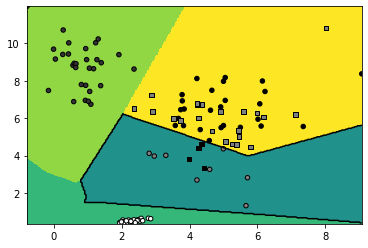

In [4]:
from fcann2 import *
from data import *


X,Y = sample_gmm_2d(4, 4, 30)
W1, W2, b1, b2 = fcann2_train(X, Y)

Y_pred = fcann2_classify(X, W1, W2, b1, b2)

#print(X)
print("Oznake razreda:", Y_pred)

# iscrtaj rezultate, decizijsku plohu
bbox=(np.min(X, axis=0), np.max(X, axis=0))
graph_surface(lambda x : fcann2_classify(x, W1, W2, b1, b2), bbox, offset=0)

# graph the data points
graph_data(X, Y, fcann2_classify(X, W1, W2, b1, b2))

# show the results
plt.show()
# e ideja, dodaj još da ti ispisuje "prave" razrede, dakle razrede od iksa
    


<b> 3. Linearna regresija u PyTorchu </b>

In [5]:
from pt_linreg import *

# opcionalni parametri X i Y
a,b = linreg_train()

# vidimo da smo dobili iste gradijente i analitički i preko PyTorcha, što je bilo očekivano :D

Ovdje
step: 0, loss:21.465438842773438, Y_:tensor([-0.9643, -1.2431, -1.5219], grad_fn=<AddBackward0>), a:tensor([0.8737], requires_grad=True), b tensor([-0.1156], requires_grad=True), a_grad: tensor([-11.5245]), b_grad: tensor([-8.4861]) a_grad_calc: -11.52450180053711, b_grad_calc: -8.486104965209961

step: 10, loss:0.00607859343290329, Y_:tensor([0.8781, 2.9604, 5.0426], grad_fn=<AddBackward0>), a:tensor([2.0792], requires_grad=True), b tensor([0.8861], requires_grad=True), a_grad: tensor([0.0304]), b_grad: tensor([-0.0793]) a_grad_calc: 0.030371349304914474, b_grad_calc: -0.07926754653453827

step: 20, loss:0.0019102919613942504, Y_:tensor([0.9329, 2.9813, 5.0296], grad_fn=<AddBackward0>), a:tensor([2.0457], requires_grad=True), b tensor([0.9366], requires_grad=True), a_grad: tensor([0.0270]), b_grad: tensor([-0.0375]) a_grad_calc: 0.026982784271240234, b_grad_calc: -0.03749207779765129

step: 30, loss:0.0006052607204765081, Y_:tensor([0.9622, 2.9895, 5.0167], grad_fn=<AddBackward0

<b>4. Logistička regresija u PyTorchu </b>

Final loss:  0.50563353
accuracy 0.675
Average precision (macro): 0.4625
Average recall (macro): 0.3993428912783752


C:\Users\Dorian\DU lab 1\pt_logreg.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float)
C:\Users\Dorian\DU lab 1\data.py:140: RuntimeWarning: invalid value encountered in longlong_scalars
  recall_i = tp_i / (tp_i + fn_i)
C:\Users\Dorian\DU lab 1\data.py:141: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_i = tp_i / (tp_i + fp_i)


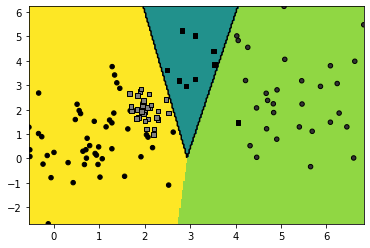

In [6]:
from pt_logreg import *
from data import class_to_onehot, eval_perf_multi
from data import *

# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)

# instanciraj podatke X i labele Yoh_
# probaj 10 5 30, to je dosta fora
X_np,Y_np = sample_gmm_2d(4, 4, 30)
Yoh_np = class_to_onehot(Y_np)

X = torch.tensor(X_np, dtype=torch.float)
Yoh_ = torch.tensor(Yoh_np, dtype=torch.int32)

# definiraj model:
ptlr = PTLogreg(X.shape[1], Yoh_.shape[1])
#print(list(ptlr.named_parameters()))  # --> ispisuje parametre modela

# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
train(ptlr, X, Yoh_, 1000, 0.1, param_lambda = 0.001, debug  = False)

# dohvati vjerojatnosti na skupu za učenje
y_pred = eval(ptlr, X)
#print(probs)

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, avg_precision, avg_recall = eval_perf_multi(Y_np, y_pred)
print("accuracy", accuracy)
print("Average precision (macro):", avg_precision)
print("Average recall (macro):", avg_recall)

# iscrtaj rezultate, decizijsku plohu
bbox=(np.min(X_np, axis=0), np.max(X_np, axis=0))
graph_surface(lambda x: eval(ptlr, torch.tensor(x, dtype=torch.float)), bbox, offset=0)

# graph the data points
graph_data(X_np, Y_np, y_pred)

# show the results
plt.show()
    

<b>5. Konfigurabilni duboki modeli u PyTorchu </b>

<b> 5.1 - osnovni slučaj </b>

Final loss:  0.28905305
Y true:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
Y pred:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 0 1]
Accuracy: 0.89375
Average precision (macro): 0.89375
Average recall (macro): 0.9044294655753491


C:\Users\Dorian\DU lab 1\pt_deep.py:249: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float)


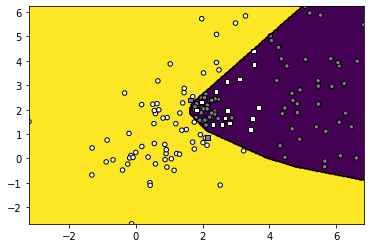

In [7]:
from pt_deep import *
from data import *

# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)
data_dim = 2 #NE DIRAJ

no_generators = 4
no_classes = 2
no_samples = 40

X_np,Y_np = sample_gmm_2d(no_generators, no_classes, no_samples)
Yoh_np = class_to_onehot(Y_np)

X = torch.tensor(X_np, dtype=torch.float)
Yoh_ = torch.tensor(Yoh_np, dtype=torch.int32)

# definiraj model (model sa 8 slojeva, 10000 epoha i lambda = 0.01 dobro radi)
# zasad sam ostavio isti model kao i gore da pokažem da radi
# AKO IMAS DUBOK MODEL (npr 2,10,10,2), moraš podesiti broj epoha i stopu učenja adekvatno
# inače će ti loss biti nan!
nnModel = PTDeep([data_dim,10,10, no_classes])

# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
train(nnModel, X, Yoh_, 10000, 0.001, param_lambda = 0, debug  = False)

# dohvati vjerojatnosti na skupu za učenje
y_pred = eval(nnModel, X)
print("Y true: ", Y_np)
print("Y pred: ", y_pred)

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, avg_precision, avg_recall = eval_perf_multi(Y_np, y_pred)
print("Accuracy:", accuracy)
#print("pr", pr)
print("Average precision (macro):", avg_precision)
print("Average recall (macro):", avg_recall)

# iscrtaj rezultate, decizijsku plohu
bbox=(np.min(X_np, axis=0), np.max(X_np, axis=0))
graph_surface(lambda x: eval(nnModel, torch.tensor(x, dtype=torch.float)), bbox, offset=0.5)

# graph the data points
graph_data(X_np, Y_np, y_pred)

# show the results
plt.show()
    

<b> 5.2 - count_params </b>

In [8]:
from pt_deep import count_params

count_params(nnModel)

Name: weights.0, shape:[2, 10]
Name: weights.1, shape:[10, 10]
Name: weights.2, shape:[10, 2]
Name: biases.0, shape:[10]
Name: biases.1, shape:[10]
Name: biases.2, shape:[2]
No params: 162


<b> 5.3 - usporedba različitih arhitektura</b>

-----------------------------
Aktivacija: ReLU, Podaci: [4, 2, 40], arhitektura:[2, 2]
Final loss:  0.4412055
Accuracy: 0.675
Average precision (macro): 0.675
Average recall (macro): 0.680528691166989


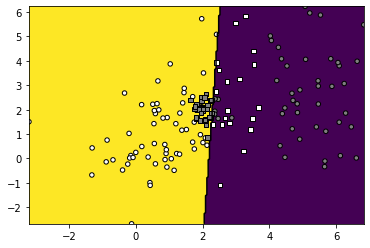

-----------------------------
Aktivacija: ReLU, Podaci: [4, 2, 40], arhitektura:[2, 10, 2]
Final loss:  0.13419151
Accuracy: 0.95
Average precision (macro): 0.95
Average recall (macro): 0.9511278195488722


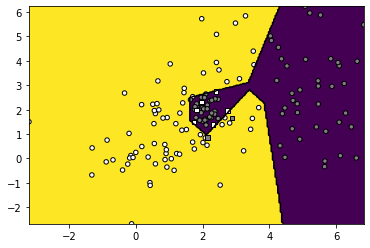

-----------------------------
Aktivacija: ReLU, Podaci: [4, 2, 40], arhitektura:[2, 10, 10, 2]
Final loss:  0.21069634
Accuracy: 0.93125
Average precision (macro): 0.9312499999999999
Average recall (macro): 0.9345772319319792


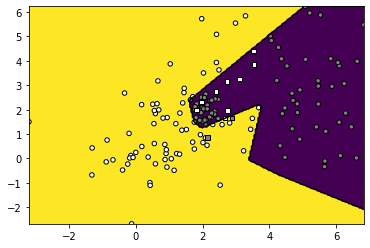

-----------------------------
Aktivacija: ReLU, Podaci: [6, 2, 10], arhitektura:[2, 2]
Final loss:  0.66816366
Accuracy: 0.6
Average precision (macro): 0.6
Average recall (macro): 0.6004464285714286


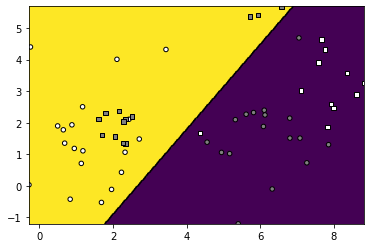

-----------------------------
Aktivacija: ReLU, Podaci: [6, 2, 10], arhitektura:[2, 10, 2]
Final loss:  0.30723968
Accuracy: 0.9
Average precision (macro): 0.9
Average recall (macro): 0.9017857142857143


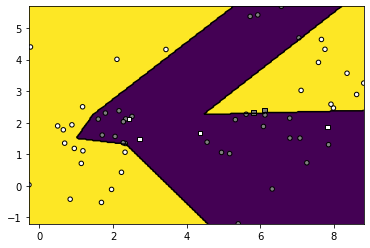

-----------------------------
Aktivacija: ReLU, Podaci: [6, 2, 10], arhitektura:[2, 10, 10, 2]
Final loss:  0.038847763
Accuracy: 0.9833333333333333
Average precision (macro): 0.9833333333333334
Average recall (macro): 0.9838709677419355


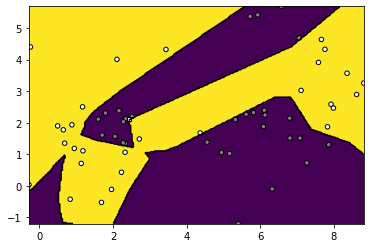

In [9]:
data_dim = 2 #NE DIRAJ

data = [[4,2,40], [6,2,10]]
arch = [[2,2], [2,10,2], [2,10,10,2]]
epochs_list = [1000, 10000, 10000]
lr_list = [0.1, 0.01, 0.01]

for d in data:
    no_generators = d[0]
    no_classes = d[1]
    no_samples = d[2]
    i = 0
    for a in arch:
        np.random.seed(100)
        print("-----------------------------")
        print(f'Aktivacija: ReLU, Podaci: {d}, arhitektura:{a}')
        X_np,Y_np = sample_gmm_2d(no_generators, no_classes, no_samples)
        Yoh_np = class_to_onehot(Y_np)

        X = torch.tensor(X_np, dtype=torch.float)
        Yoh_ = torch.tensor(Yoh_np, dtype=torch.int32)
        nnModel = PTDeep(a)
        
        epochs = epochs_list[i]
        lr = lr_list[i]
        i += 1
        
        train(nnModel, X, Yoh_, epochs, lr, param_lambda = 0, debug  = False)

        y_pred = eval(nnModel, X)
        
        accuracy, pr, avg_precision, avg_recall = eval_perf_multi(Y_np, y_pred)
        print("Accuracy:", accuracy)
        #print("pr", pr)
        print("Average precision (macro):", avg_precision)
        print("Average recall (macro):", avg_recall)

        # iscrtaj rezultate, decizijsku plohu
        bbox=(np.min(X_np, axis=0), np.max(X_np, axis=0))
        graph_surface(lambda x: eval(nnModel, torch.tensor(x, dtype=torch.float)), bbox, offset=0.5)

        # graph the data points
        graph_data(X_np, Y_np, y_pred)
        
        plt.show()

Vidimo da je najsloženiji model nad oba dataseta postigao najmanji loss, no naravno postavlja se pitanje je li takav model možda prenaučen.
Jedna stvar koju sam primijetio je koliko inicijalizacija početnih težina ogromno utječe na konačne performanse modela. Kad sam koristio običnu (Gaussovu) incijalizaciju, postizao sam ok rezultate, ali složeniji(dublji) modeli mi nisu postizali očekivane rezultate. No kad sam, prema uputama na https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/ primijenio Kaming incijalizaciju, koja je preporučena inicializacja za NN sa ReLU aktivacijskom funkcijom, te dodao momentum od 0.9 u SGD optimizer (također preporučena vrijednost), primijetio sam da mi odjednom duboki modeli postižu puno, puno bolje rezultate.

<b>5.4 - sigmoida vs ReLU</b>

-----------------------------
Aktivacija: sigmoida, Podaci: [4, 2, 40], arhitektura:[2, 2]
Final loss:  0.4412055
Accuracy: 0.675
Average precision (macro): 0.675
Average recall (macro): 0.680528691166989


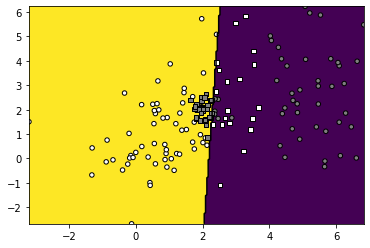

-----------------------------
Aktivacija: sigmoida, Podaci: [4, 2, 40], arhitektura:[2, 10, 2]
Final loss:  0.27074498
Accuracy: 0.8875
Average precision (macro): 0.8875
Average recall (macro): 0.8997421018697614


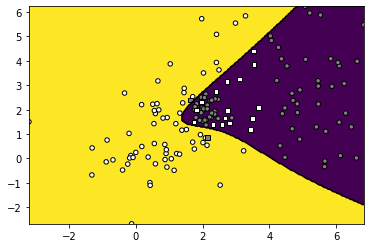

-----------------------------
Aktivacija: sigmoida, Podaci: [4, 2, 40], arhitektura:[2, 10, 10, 2]
Final loss:  0.29497913
Accuracy: 0.8875
Average precision (macro): 0.8875
Average recall (macro): 0.8997421018697614


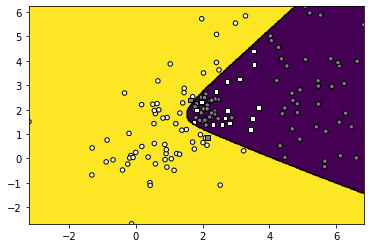

-----------------------------
Aktivacija: sigmoida, Podaci: [6, 2, 10], arhitektura:[2, 2]
Final loss:  0.6681636
Accuracy: 0.6
Average precision (macro): 0.6
Average recall (macro): 0.6004464285714286


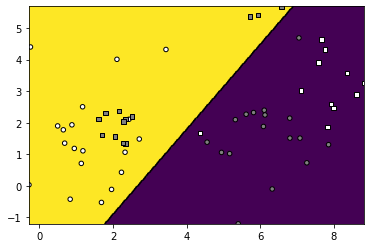

-----------------------------
Aktivacija: sigmoida, Podaci: [6, 2, 10], arhitektura:[2, 10, 2]
Final loss:  0.20540227
Accuracy: 0.95
Average precision (macro): 0.95
Average recall (macro): 0.9545454545454546


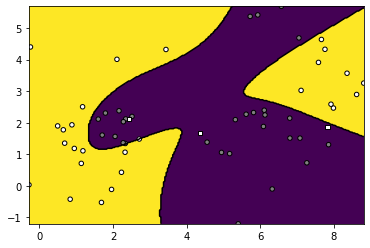

-----------------------------
Aktivacija: sigmoida, Podaci: [6, 2, 10], arhitektura:[2, 10, 10, 2]
Final loss:  0.15412329
Accuracy: 0.9833333333333333
Average precision (macro): 0.9833333333333334
Average recall (macro): 0.9838709677419355


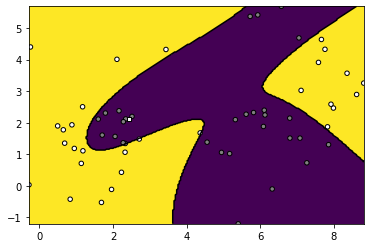

In [10]:
data_dim = 2 #NE DIRAJ

data = [[4,2,40], [6,2,10]]
arch = [[2,2], [2,10,2], [2,10,10,2]]
epochs_list = [1000, 10000, 10000]
lr_list = [0.1, 0.01, 0.01]

for d in data:
    no_generators = d[0]
    no_classes = d[1]
    no_samples = d[2]
    i = 0
    for a in arch:
        np.random.seed(100)
        print("-----------------------------")
        print(f'Aktivacija: sigmoida, Podaci: {d}, arhitektura:{a}')
        X_np,Y_np = sample_gmm_2d(no_generators, no_classes, no_samples)
        Yoh_np = class_to_onehot(Y_np)

        X = torch.tensor(X_np, dtype=torch.float)
        Yoh_ = torch.tensor(Yoh_np, dtype=torch.int32)
        nnModel = PTDeep(a, activation = torch.sigmoid)
        
        epochs = epochs_list[i]
        lr = lr_list[i]
        i += 1
        
        train(nnModel, X, Yoh_, epochs, lr, param_lambda = 0, debug  = False)

        y_pred = eval(nnModel, X)
        
        accuracy, pr, avg_precision, avg_recall = eval_perf_multi(Y_np, y_pred)
        print("Accuracy:", accuracy)
        #print("pr", pr)
        print("Average precision (macro):", avg_precision)
        print("Average recall (macro):", avg_recall)

        # iscrtaj rezultate, decizijsku plohu
        bbox=(np.min(X_np, axis=0), np.max(X_np, axis=0))
        graph_surface(lambda x: eval(nnModel, torch.tensor(x, dtype=torch.float)), bbox, offset=0.5)

        # graph the data points
        graph_data(X_np, Y_np, y_pred)
        
        plt.show()

Očekivano, vidimo da je za pliće modele sigmoida bolja od ReLU, ali za dublje modele bolji je ReLU

<b> 6. Usporedba s jezgrenim SVM-om  </b>

<b> 6.1 Prikaz rada SVM-a na skupu podataka (linearna jezgra) </b>

Accuracy: 0.7375
Average precision (macro): 0.7375
Average recall (macro): 0.8066989507667474


C:\Users\Dorian\DU lab 1\data.py:69: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx0, xx1, values,


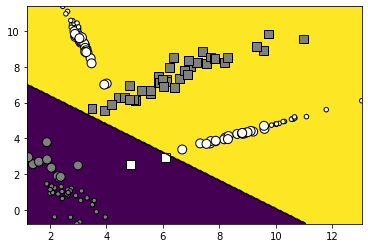

In [11]:
from ksvm_wrap import *
from data import *

no_generators = 4
no_classes = 2
no_samples = 40

X,Y = sample_gmm_2d(no_generators, no_classes, no_samples)
svmModel = KSVMWrap(X, Y)

y_pred = svmModel.predict(X)

accuracy, pr, avg_precision, avg_recall = eval_perf_multi(Y, y_pred)
print("Accuracy:", accuracy)
print("Average precision (macro):", avg_precision)
print("Average recall (macro):", avg_recall)


# iscrtaj rezultate, decizijsku plohu
bbox=(np.min(X, axis=0), np.max(X, axis=0))
graph_surface(lambda x: svmModel.predict(x), bbox, offset=0.5)

# graph the data points
graph_data(X, Y, y_pred, special = svmModel.get_support())
        
plt.show()





<b>6.2 Usporedba SVM-a i dubokih modela </b>

-------------------------------------------
Duboki model
Final loss:  0.35041398
NN Accuracy: 0.86
NN Average precision (macro): 0.843125
NN Average recall (macro): 0.8506992863118086


C:\Users\Dorian\DU lab 1\pt_deep.py:249: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float)


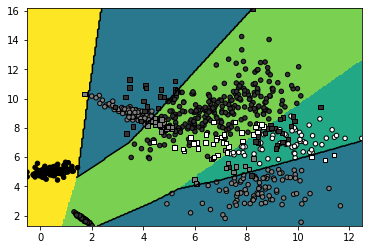

-------------------------------------------
SVM - linearna jezgra
NN Accuracy: 0.7975
NN Average precision (macro): 0.7625
NN Average recall (macro): 0.8382324381484239


C:\Users\Dorian\DU lab 1\data.py:69: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx0, xx1, values,


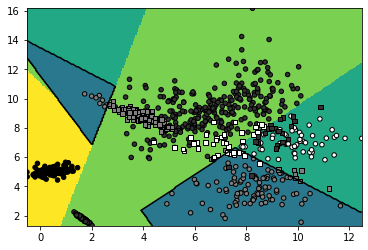

-------------------------------------------
SVM - polinomijalna jezgra
NN Accuracy: 0.85375
NN Average precision (macro): 0.81625
NN Average recall (macro): 0.8811774858924141


C:\Users\Dorian\DU lab 1\data.py:69: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx0, xx1, values,


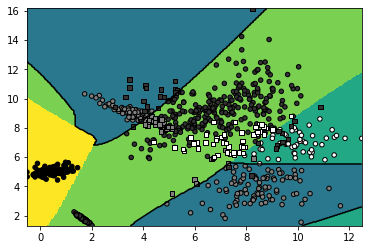

In [12]:
from ksvm_wrap import *
from data import *
from pt_deep import *

no_generators = 8
no_classes = 4
no_samples = 100

X_np,Y_np = sample_gmm_2d(no_generators, no_classes, no_samples)
Yoh_np = class_to_onehot(Y_np)

print("-------------------------------------------")
print("Duboki model")

nnModel = PTDeep([2,16,16,no_classes])

X = torch.tensor(X_np, dtype=torch.float)
Yoh_ = torch.tensor(Yoh_np, dtype=torch.int32)

train(nnModel, X, Yoh_, 10000, 0.001, param_lambda = 0, debug  = False)

y_pred = eval(nnModel, X)
accuracy, pr, avg_precision, avg_recall = eval_perf_multi(Y_np, y_pred)
print("NN Accuracy:", accuracy)
print("NN Average precision (macro):", avg_precision)
print("NN Average recall (macro):", avg_recall)

bbox=(np.min(X_np, axis=0), np.max(X_np, axis=0))
graph_surface(lambda x: eval(nnModel, torch.tensor(x, dtype=torch.float)), bbox, offset=0.5)

graph_data(X_np, Y_np, y_pred)

plt.show()

print("-------------------------------------------")
print("SVM - linearna jezgra")

svmModel = KSVMWrap(X_np, Y_np)

y_pred = svmModel.predict(X)
accuracy, pr, avg_precision, avg_recall = eval_perf_multi(Y_np, y_pred)
print("NN Accuracy:", accuracy)
print("NN Average precision (macro):", avg_precision)
print("NN Average recall (macro):", avg_recall)

bbox=(np.min(X_np, axis=0), np.max(X_np, axis=0))
graph_surface(lambda x: svmModel.predict(x), bbox, offset=0.5)

graph_data(X_np, Y_np, y_pred)

plt.show()

print("-------------------------------------------")
print("SVM - polinomijalna jezgra")

svmModel = KSVMWrap(X_np, Y_np, param_svm_c=1, param_svm_gamma='auto', kernel="poly")

y_pred = svmModel.predict(X)
accuracy, pr, avg_precision, avg_recall = eval_perf_multi(Y_np, y_pred)
print("NN Accuracy:", accuracy)
print("NN Average precision (macro):", avg_precision)
print("NN Average recall (macro):", avg_recall)

bbox=(np.min(X_np, axis=0), np.max(X_np, axis=0))
graph_surface(lambda x: svmModel.predict(x), bbox, offset=0.5)

graph_data(X_np, Y_np, y_pred)

plt.show()





Primijećujem da NN sa 16,16 skrivenih neurona postiže bolje rezultate nego SVM sa linearnom decizijskom funkcijom, 
što opet nije neočekivano zbog veće složenosti, a pogotovo zbog toga što NN može modelirati nelinearne funkcije, odnosno nelinearnu granicu
između klasa.

S druge strane, SVM sa polinomijalnom jezgrenom funkcijom pokazuje znatno bolje performanse nego linearni SVM, no i dalje nije dorastao (dovoljno složenom!) dubokom modelu, npr. [2,16,16,2]



Neke prednosti NN nad SVM-ovima su to što možemo unaprijed ograničiti veličinu mreže i broj parametara, što nam pomaže u rješavanju prokletstva dimenzionalnosti. Kod SVM-ova ne postoji način da (direktno) ograničimo broj parametra, već on ovisi o broju potpornih vektora koje model koristi. S druge strane, prednosti SVM-a su <b>teoretski garantirana konvergencija optimalnom rješenju </b> (što duboki modeli ne garantiraju), te često duže vrijeme treniranja neuronskih mreža u odnosu na SVM-ove  (barem u složenijm slučajevima). Općenito govoreći, (složeni) duboki modeli će imati veći broj parametara od SVM modela koje bi koristili za rješavanje istih problema.

Što se tiče funkcija gubitka, kod NN koristimo negativnu log izglednost, dok kod SVM-a uopće ne moramo koristiti funkciju gubitka, već optimizaciju parametara (tj. pronalazak potpornih vektora) možemo riješiti na neki drugi način, npr. definirati optimizacijski problem kao kvadratni program i rješavati ga adekvatnim metodama. Međutim, možemo definirati optimizacijski problem SVM-a kroz funkciju gubitka, te problem rješavati npr. gradijentnim spustom, pri čemu koristimo gubitak zglobnice (zovemo ju tako jer izgledom podsjeća na ReLU):

$$
L\left(y \mathbf{w}^{\mathrm{T}} \mathbf{x}\right)=\max \left(0,1-y \mathbf{w}^{\mathrm{T}} \mathbf{x}\right)
$$

Međutim, problem kod ove funkcije gubitka je što nije diferencijabilna u svim točkama, stoga koristimo metode poput podgradijenata. Također, ova funkcija gubitka nije previše ekspresivna, pa taj problem često rješavamo preslikavanjima korištenjem jezgrenih funkcija.

S druge strane, kod NN, kao funkciju gubitka koristimo negativnu log izglednost.

Za problem klasifikacije podataka uzrokovanih iz  mješavine Gaussovih distribucija, najvjerojatnije bi se odlučio na SVM model sa RBF jezgrom, jer je više i nego dovoljan za takav problem, a i zato što bi NN dovoljno složena za rješavanje takvog problema potencijalno bila sklona prenaučenosti na skupu podataka za treniranje.
 







<b>6.4 RBF SVM </b>

Accuracy: 0.9
Average precision (macro): 0.925
Average recall (macro): 0.8846153846153846


C:\Users\Dorian\DU lab 1\data.py:69: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx0, xx1, values,


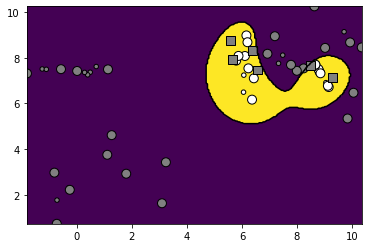

In [13]:
from ksvm_wrap import *
from data import *

no_generators = 6
no_classes = 2
no_samples = 10

X,Y = sample_gmm_2d(no_generators, no_classes, no_samples)
svmModel = KSVMWrap(X, Y,param_svm_c=1, param_svm_gamma='auto', kernel = "rbf")

y_pred = svmModel.predict(X)

accuracy, pr, avg_precision, avg_recall = eval_perf_multi(Y, y_pred)
print("Accuracy:", accuracy)
print("Average precision (macro):", avg_precision)
print("Average recall (macro):", avg_recall)


# iscrtaj rezultate, decizijsku plohu
bbox=(np.min(X, axis=0), np.max(X, axis=0))
graph_surface(lambda x: svmModel.predict(x), bbox, offset=0.5)

# graph the data points
graph_data(X, Y, y_pred, special = svmModel.get_support())
        
plt.show()


Stvar koju možemo primijetiti kod SVM-a sa RBF jezgrenom funkcijom je izuzetno velika točnost na skupu podataka za treniranje.